## 2 Exploratory Data Analysis

## 2.1 Load the Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
c_data = pd.read_csv('../Data/c_data_cleaned.csv')

In [3]:
c_data.head(5)

,ID,Education,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Expenses,Children,Age,Relationship Status
0,5524,Undergraduate,58138.0,04-09-2012,58,635,88,546,172,88,...,0,0,0,3,11,1,1617,0,64,Single
1,2174,Undergraduate,46344.0,08-03-2014,38,11,1,6,2,1,...,0,0,0,3,11,0,27,2,67,Single
2,4141,Undergraduate,71613.0,21-08-2013,26,426,49,127,111,21,...,0,0,0,3,11,0,776,0,56,Couple
3,6182,Undergraduate,26646.0,10-02-2014,26,11,4,20,10,3,...,0,0,0,3,11,0,53,1,37,Couple
4,5324,PhD,58293.0,19-01-2014,94,173,43,118,46,27,...,0,0,0,3,11,0,422,1,40,Couple


## 2.2 Dropping Uncessary Columns

In [4]:
c_data.columns

Index(['ID', 'Education', 'Income', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Total_Expenses', 'Children', 'Age', 'Relationship Status'],
      dtype='object')

In [5]:
#'Z_CostContact', 'Z_Revenue' is same for all rows. Also, 'ID' doesn't provide any additional information about our data
c_data.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [6]:
c_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2236.0,51961.906544,21411.404811,1730.0,35502.5,51684.0,68275.75,162397.0
Recency,2236.0,49.116279,28.957284,0.0,24.0,49.0,74.00,99.0
MntWines,2236.0,304.127460,336.591810,0.0,24.0,174.0,504.25,1493.0
MntFruits,2236.0,26.275939,39.724007,0.0,1.0,8.0,33.00,199.0
MntMeatProducts,2236.0,166.983453,225.689645,0.0,16.0,67.0,232.00,1725.0
MntFishProducts,2236.0,37.536225,54.648562,0.0,3.0,12.0,50.00,259.0
MntSweetProducts,2236.0,27.080501,41.299504,0.0,1.0,8.0,33.00,263.0
MntGoldProds,2236.0,43.983005,52.061568,0.0,9.0,24.0,56.00,362.0
NumDealsPurchases,2236.0,2.326029,1.933032,0.0,1.0,2.0,3.00,15.0
NumWebPurchases,2236.0,4.087657,2.779988,0.0,2.0,4.0,6.00,27.0


## 2.3 Exploring Individual Variables

### 2.3.1 Education

<Figure size 504x504 with 0 Axes>

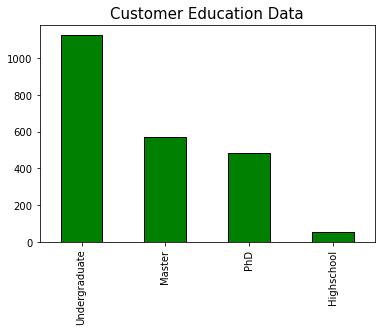

<Figure size 504x504 with 0 Axes>

In [7]:
c_data['Education'].value_counts().plot(kind='bar',color = 'green',edgecolor='black')
plt.title("Customer Education Data",fontsize=15)
plt.figure(figsize=(7,7))

In [8]:
education = c_data["Education"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print(education)
print('\nMost of the costumers only have undergraduate degree or less')


Undergraduate    50.4%
Master           25.5%
PhD              21.7%
Highschool        2.4%
Name: Education, dtype: object

Most of the costumers only have undergraduate degree or less


### 2.3.2 Income

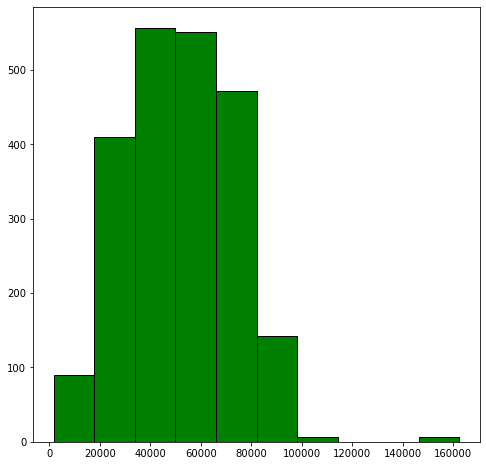

In [9]:
plt.figure(figsize=(8,8))
plt.hist(c_data["Income"],color = 'green',edgecolor='black')
plt.show()

In [10]:
c_data["Income"].describe()

count      2236.000000
mean      51961.906544
std       21411.404811
min        1730.000000
25%       35502.500000
50%       51684.000000
75%       68275.750000
max      162397.000000
Name: Income, dtype: float64

### 2.3.3 Total_Expenses 

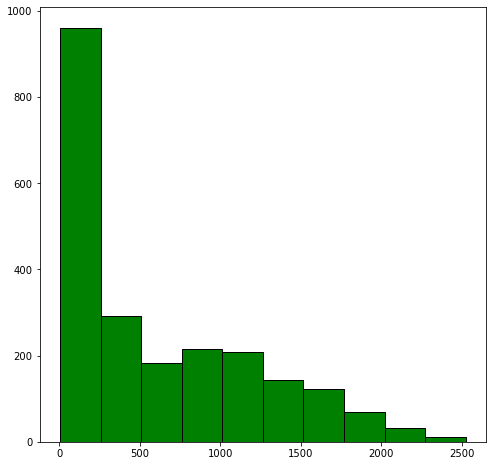

In [11]:
plt.figure(figsize=(8,8))
plt.hist(c_data["Total_Expenses"],color = 'green',edgecolor='black')
plt.show()

In [12]:
c_data["Total_Expenses"].describe()

count    2236.000000
mean      605.986583
std       601.865156
min         5.000000
25%        69.000000
50%       396.500000
75%      1045.500000
max      2525.000000
Name: Total_Expenses, dtype: float64

### 2.3.4 Total_Accepted_Cmp

In [13]:
c_data.columns

Index(['Education', 'Income', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Total_Expenses', 'Children',
       'Age', 'Relationship Status'],
      dtype='object')

In [14]:
c_data['TotalAcceptedCmp'] = c_data['AcceptedCmp1'] + c_data['AcceptedCmp2'] + c_data['AcceptedCmp3'] + c_data['AcceptedCmp4'] + c_data['AcceptedCmp5'] + c_data['Response']

In [15]:
c_data['TotalAcceptedCmp'].value_counts()

0    1628
1     369
2     142
3      51
4      36
5      10
Name: TotalAcceptedCmp, dtype: int64

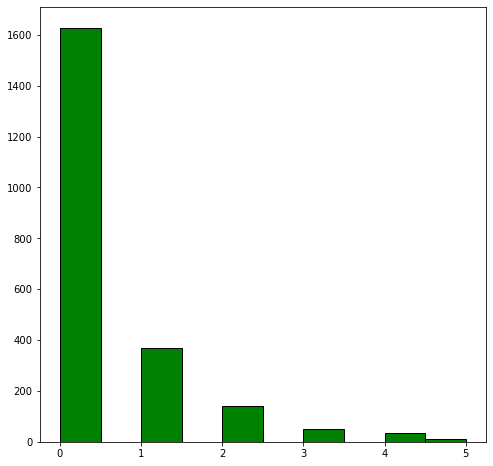

In [16]:
plt.figure(figsize=(8,8))
plt.hist(c_data['TotalAcceptedCmp'],color = 'green',edgecolor='black')
plt.show()

In [17]:
c_data["TotalAcceptedCmp"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

0    72.8%
1    16.5%
2     6.4%
3     2.3%
4     1.6%
5     0.4%
Name: TotalAcceptedCmp, dtype: object

%72.8 of people didn't accept any promotion at all
16.5% of people accepted promotion in the first offer

### 2.3.5 Num_Total_Purchases

In [18]:
c_data['NumTotalPurchases'] = c_data['NumWebPurchases'] + c_data['NumCatalogPurchases'] + c_data['NumStorePurchases']

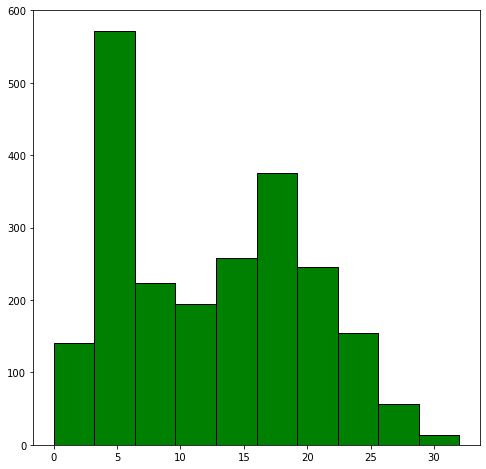

In [19]:
plt.figure(figsize=(8,8))
plt.hist(c_data['NumTotalPurchases'],color = 'green',edgecolor='black')
plt.show()

### 2.3.6 Children

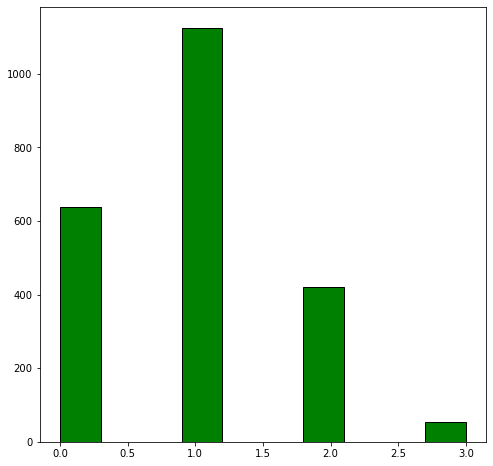

In [20]:
plt.figure(figsize=(8,8))
plt.hist(c_data['Children'],color = 'green',edgecolor='black')
plt.show()

In [21]:
c_data["Children"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

1    50.3%
0    28.5%
2    18.8%
3     2.4%
Name: Children, dtype: object

Half of the costumers only have one children

### 2.3.7 Age

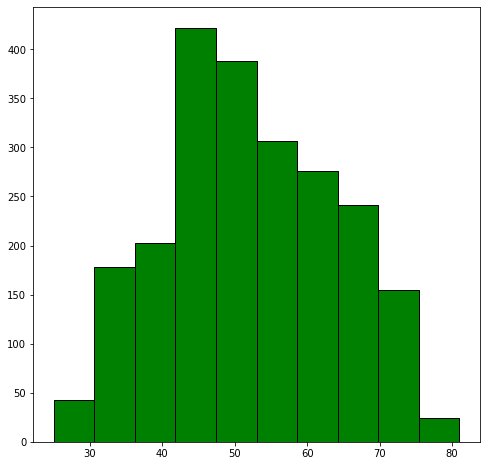

In [22]:
plt.figure(figsize=(8,8))
plt.hist(c_data['Age'],color = 'green',edgecolor='black')
plt.show()

In [23]:
c_data["Age"].describe()

count    2236.000000
mean       52.101968
std        11.703281
min        25.000000
25%        44.000000
50%        51.000000
75%        62.000000
max        81.000000
Name: Age, dtype: float64

### 2.3.8 Relationship Status

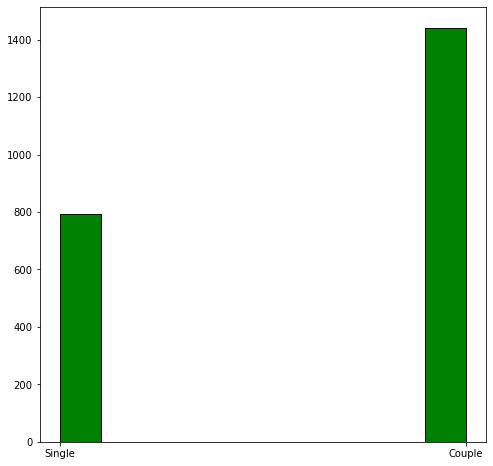

In [24]:
plt.figure(figsize=(8,8))
plt.hist(c_data['Relationship Status'],color = 'green',edgecolor='black')
plt.show()

In [25]:
c_data["Relationship Status"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Couple    64.5%
Single    35.5%
Name: Relationship Status, dtype: object

### 2.3.9 Dt_Customer

In [26]:
c_data.head(3)

,Education,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Expenses,Children,Age,Relationship Status,TotalAcceptedCmp,NumTotalPurchases
0,Undergraduate,58138.0,04-09-2012,58,635,88,546,172,88,88,...,0,0,0,1,1617,0,64,Single,1,22
1,Undergraduate,46344.0,08-03-2014,38,11,1,6,2,1,6,...,0,0,0,0,27,2,67,Single,0,4
2,Undergraduate,71613.0,21-08-2013,26,426,49,127,111,21,42,...,0,0,0,0,776,0,56,Couple,0,20


In [27]:
c_data["Dt_Customer"] = pd.to_datetime(c_data["Dt_Customer"])
dates = []
for i in c_data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  

In [28]:
# Newest and oldest customers
print("The newest customer:",max(dates))
print("The oldest customer:",min(dates))

The newest customer: 2014-12-06
The oldest customer: 2012-01-08


We don't know the data collection date. Therefore using the record of newest may give an idea about how long costumers shopping from the company

In [29]:
#Created a feature "Customer_For"
days = []
#Using the newest customer date as the starting point
max_dates = max(dates)
for i in dates:
    engagement = max_dates - i
    days.append(engagement)
c_data["Customer_Day"] = days

In [30]:
c_data["Customer_Day"] = c_data["Customer_Day"].dt.days

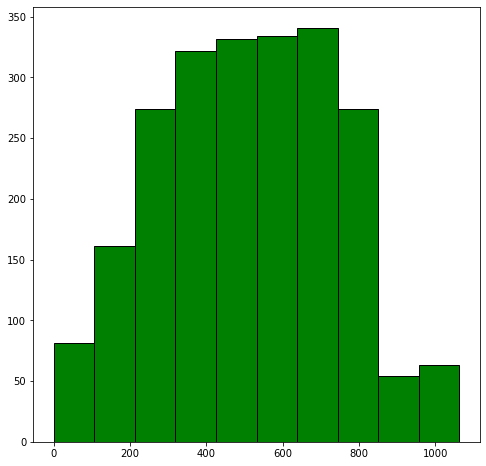

In [31]:
plt.figure(figsize=(8,8))
plt.hist(c_data['Customer_Day'],color = 'green',edgecolor='black')
plt.show()

In [32]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Education            2236 non-null   object        
 1   Income               2236 non-null   float64       
 2   Dt_Customer          2236 non-null   datetime64[ns]
 3   Recency              2236 non-null   int64         
 4   MntWines             2236 non-null   int64         
 5   MntFruits            2236 non-null   int64         
 6   MntMeatProducts      2236 non-null   int64         
 7   MntFishProducts      2236 non-null   int64         
 8   MntSweetProducts     2236 non-null   int64         
 9   MntGoldProds         2236 non-null   int64         
 10  NumDealsPurchases    2236 non-null   int64         
 11  NumWebPurchases      2236 non-null   int64         
 12  NumCatalogPurchases  2236 non-null   int64         
 13  NumStorePurchases    2236 non-nul

In [33]:
#Converting Customer_Day to numeric value to be able to analyze correlations
c_data["Customer_Day"] = pd.to_numeric(c_data["Customer_Day"])

In [34]:
c_data.columns

Index(['Education', 'Income', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Total_Expenses', 'Children',
       'Age', 'Relationship Status', 'TotalAcceptedCmp', 'NumTotalPurchases',
       'Customer_Day'],
      dtype='object')

## 2.4 Relationship Between Selected Variables and the Target

<AxesSubplot:>

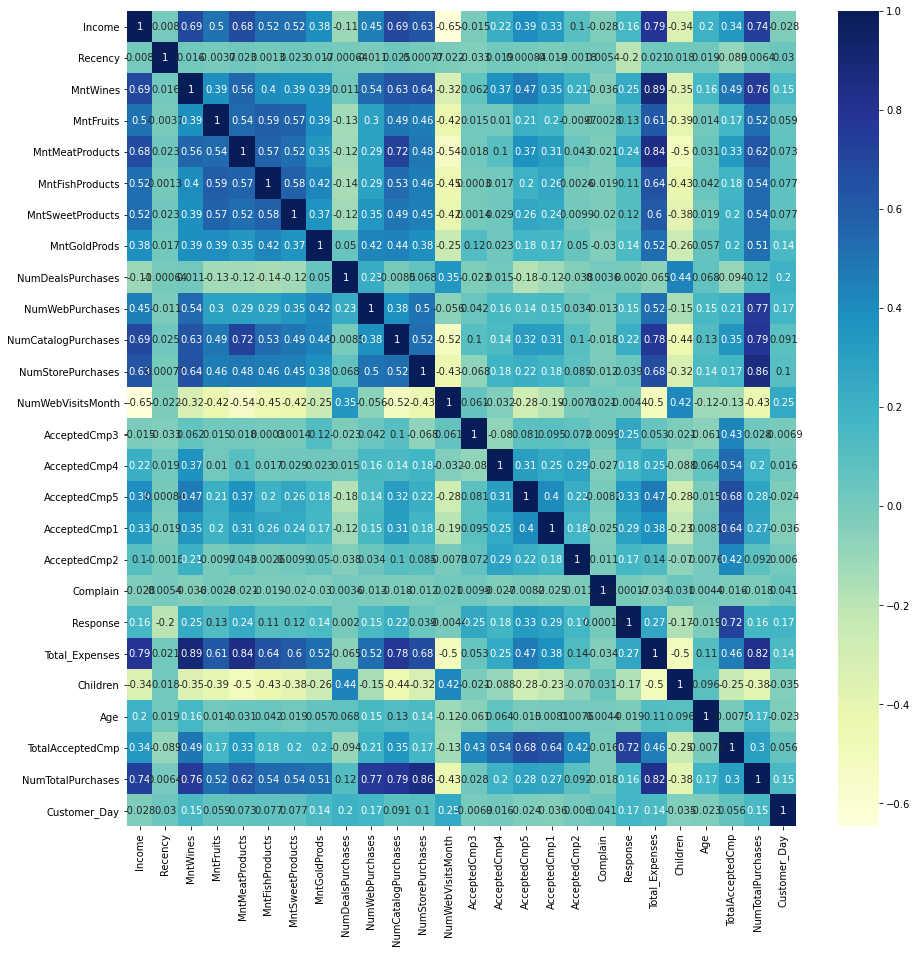

In [35]:
c_corr = c_data.corr()
plt.figure(figsize=(15,15))  
sns.heatmap(c_corr, annot=True, cmap="YlGnBu")

Our target feature is Total_Expenses because we are trying to explain how total expenditure can be explained by using different costumer information.

There are strong positive correlations between Total_Expenses and NumTotalPurchases(0.82), NumCatalogPurchases(0.78), MntMeatProducts(0.84), MntWines(0.89), Income(0.79).

Interestingly, there are negative correlations between Total_Expenses and Children(-0.5), NumWebVisitsMonth(-0.5).

### Two Feature Analysis

Exploring the positive and negative correlations between the target feature and other features more closely

I will be using barplot for discrete features and regplot for continous features to make visualizations more useful.

#### Positive Correlations

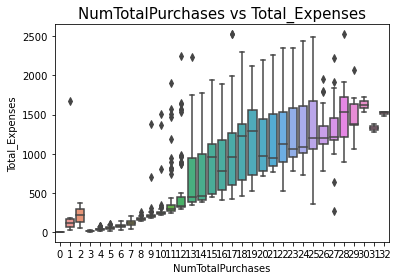

In [36]:
sns.boxplot(x='NumTotalPurchases', y='Total_Expenses', data=c_data)
plt.xlabel('NumTotalPurchases')
plt.ylabel('Total_Expenses')
plt.title('NumTotalPurchases vs Total_Expenses', fontsize=15)
plt.show()

Unsuprisingly, there is a strong linear relationship between NumTotalPurchases and Total_Expenses. However, graph tells us that even though some customers only bought 1 or 2 products, their expenditure is more than customers buying 10 or less. This shows that, some customers prefer to buy a couple expensive products instead of buying a lot of products. 

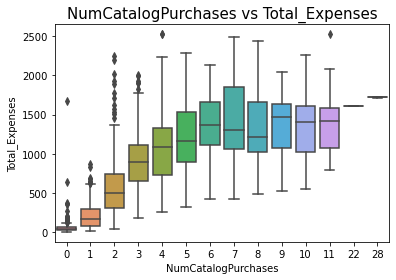

In [37]:
sns.boxplot(x='NumCatalogPurchases', y='Total_Expenses', data=c_data)
plt.xlabel('NumCatalogPurchases')
plt.ylabel('Total_Expenses')
plt.title('NumCatalogPurchases vs Total_Expenses', fontsize=15)
plt.show()

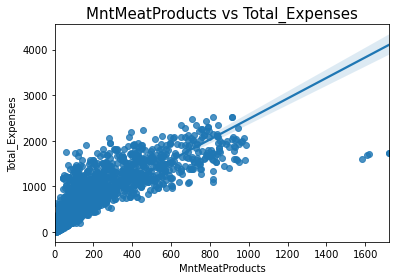

In [38]:
sns.regplot(x='MntMeatProducts', y='Total_Expenses', data=c_data)
plt.xlabel('MntMeatProducts')
plt.ylabel('Total_Expenses')
plt.title('MntMeatProducts vs Total_Expenses', fontsize=15)
plt.show()

There are some outliers but overall strong linear correlation between MntMeatProducts and Total_Expenses

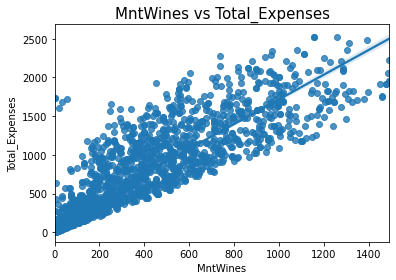

In [39]:
sns.regplot(x='MntWines', y='Total_Expenses', data=c_data)
plt.xlabel('MntWines')
plt.ylabel('Total_Expenses')
plt.title('MntWines vs Total_Expenses', fontsize=15)
plt.show()

There are some outliers and considerable variance in data

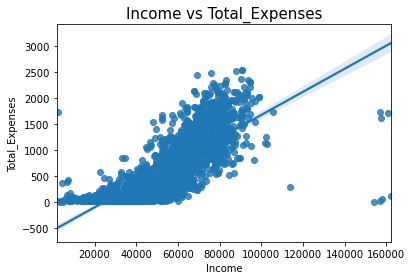

In [40]:
sns.regplot(x='Income', y='Total_Expenses', data=c_data)
plt.xlabel('Income')
plt.ylabel('Total_Expenses')
plt.title('Income vs Total_Expenses', fontsize=15)
plt.show()

There are some outliers for income greater than $120,000

#### Negative Correlations

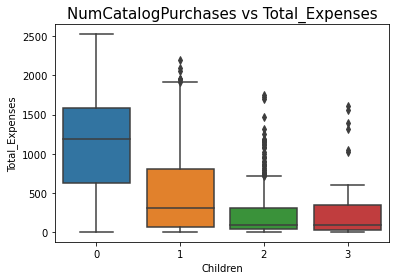

In [41]:
sns.boxplot(x='Children', y='Total_Expenses', data=c_data)
plt.xlabel('Children')
plt.ylabel('Total_Expenses')
plt.title('NumCatalogPurchases vs Total_Expenses', fontsize=15)
plt.show()

Interesting to see that customers having children have considerably less total expense than customers not having any children

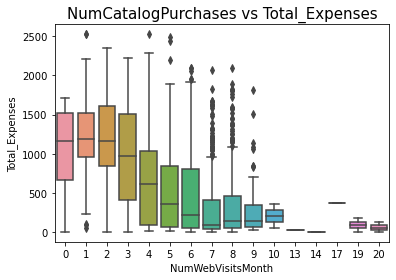

In [42]:
sns.boxplot(x='NumWebVisitsMonth', y='Total_Expenses', data=c_data)
plt.xlabel('NumWebVisitsMonth')
plt.ylabel('Total_Expenses')
plt.title('NumCatalogPurchases vs Total_Expenses', fontsize=15)
plt.show()

Suprisingly, customers visiting company's website more tend to spend less

## 2.5 Data Wrangling

In this section, I will change object features to numerical for model to be able to interpret these features

In [43]:
c_data['Education'].value_counts()

Undergraduate    1126
Master            571
PhD               485
Highschool         54
Name: Education, dtype: int64

In [44]:
#Changing Education data with numerical values
c_data['Education'] = c_data['Education'].str.replace('Highschool', '0')
c_data['Education'] = c_data['Education'].str.replace('Undergraduate', '1')
c_data['Education'] = c_data['Education'].str.replace('Master', '2')
c_data['Education'] = c_data['Education'].str.replace('PhD', '3')

In [45]:
c_data['Relationship Status'].value_counts()

Couple    1442
Single     794
Name: Relationship Status, dtype: int64

In [46]:
#Changing Relationship Status with numerical values
c_data['Relationship Status'] = c_data['Relationship Status'].str.replace('Single', '0')
c_data['Relationship Status'] = c_data['Relationship Status'].str.replace('Couple', '1')

In [47]:
c_data['Education'] = pd.to_numeric(c_data['Education'],errors = 'coerce')
c_data['Relationship Status'] = pd.to_numeric(c_data['Relationship Status'],errors = 'coerce')

In [48]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Education            2236 non-null   int64         
 1   Income               2236 non-null   float64       
 2   Dt_Customer          2236 non-null   datetime64[ns]
 3   Recency              2236 non-null   int64         
 4   MntWines             2236 non-null   int64         
 5   MntFruits            2236 non-null   int64         
 6   MntMeatProducts      2236 non-null   int64         
 7   MntFishProducts      2236 non-null   int64         
 8   MntSweetProducts     2236 non-null   int64         
 9   MntGoldProds         2236 non-null   int64         
 10  NumDealsPurchases    2236 non-null   int64         
 11  NumWebPurchases      2236 non-null   int64         
 12  NumCatalogPurchases  2236 non-null   int64         
 13  NumStorePurchases    2236 non-nul

In [49]:
#Save the dataset
c_data.to_csv('../Data/c_data_EDA.csv', index = False)